<a id="1"></a>
# <div style="padding: 20px; color: cyan; margin: 0; font-size: 30px; font-family: Arial; text-align: left; border-radius: 5px; background-color: #000000; border: 2px solid blue;"><b>Machine Learning Model</b></div>

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn.preprocessing
from tensorflow import keras

<a id="1.2"></a>
<h2 style=" font-family: Arial; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #008B8B; padding: 15px; border-top: 2px solid blue; border-bottom: 2px solid blue;
"><b>Data </b> Preparation

In [2]:
df = pd.read_csv("../data/processed/processed_data.csv")
df.head(5)

,min_players,max_players,min_playtime,max_playtime,playing_time,min_age,complexity_rating,user_ratings,user_comments,type,category,mechanism,average_rating
0,2,4,30,60,45,10,2.47,16000,4000,Strategy,Abstract Strategy,Area Majority / Influence,7.5
1,2,4,30,60,45,10,2.47,16000,4000,Strategy,Abstract Strategy,Hand Management,7.5
2,2,4,30,60,45,10,2.47,16000,4000,Strategy,Abstract Strategy,Hexagon Grid,7.5
3,2,4,30,60,45,10,2.47,16000,4000,Strategy,Abstract Strategy,Once-Per-Game Abilities,7.5
4,2,4,30,60,45,10,2.47,16000,4000,Strategy,Abstract Strategy,Set Collection,7.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41927 entries, 0 to 41926
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   min_players        41927 non-null  int64  
 1   max_players        41927 non-null  int64  
 2   min_playtime       41927 non-null  int64  
 3   max_playtime       41927 non-null  int64  
 4   playing_time       41927 non-null  int64  
 5   min_age            41927 non-null  int64  
 6   complexity_rating  41927 non-null  float64
 7   user_ratings       41927 non-null  int64  
 8   user_comments      41927 non-null  int64  
 9   type               41927 non-null  object 
 10  category           41927 non-null  object 
 11  mechanism          41927 non-null  object 
 12  average_rating     41927 non-null  float64
dtypes: float64(2), int64(8), object(3)
memory usage: 4.2+ MB


<a id="1.2"></a>
<h2 style=" font-family: Arial; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #008B8B; padding: 15px; border-top: 2px solid blue; border-bottom: 2px solid blue;
"><b>Feature </b> engineering

In [4]:
def convertCategoryToIndex(value, category):
    return category.index(value)

## Convert data to float in column type, category and mechanism

In [5]:
df['average_rating'] = df['average_rating'] * 10
df['average_rating'] = df['average_rating'].astype('int')
df['type'] = df['type'].apply(convertCategoryToIndex, category = list(df['type'].unique()))
df['category'] = df['category'].apply(convertCategoryToIndex, category = list(df['category'].unique()))
df['mechanism'] = df['mechanism'].apply(convertCategoryToIndex, category = list(df['mechanism'].unique()))
# df = pd.get_dummies(df)
# label = df['average_rating']
# df.drop(columns=['average_rating'], inplace=True)
# df.drop(columns=['type', 'category', 'mechanism'], inplace=True)
# df = pd.concat([df, label], axis=1)
df.head(5)

,min_players,max_players,min_playtime,max_playtime,playing_time,min_age,complexity_rating,user_ratings,user_comments,type,category,mechanism,average_rating
0,2,4,30,60,45,10,2.47,16000,4000,0,0,0,75
1,2,4,30,60,45,10,2.47,16000,4000,0,0,1,75
2,2,4,30,60,45,10,2.47,16000,4000,0,0,2,75
3,2,4,30,60,45,10,2.47,16000,4000,0,0,3,75
4,2,4,30,60,45,10,2.47,16000,4000,0,0,4,75


## Min-Max scale value to 0-1

In [6]:
columns = df.columns[:-1]
for column in columns:
    scaler = sklearn.preprocessing.MinMaxScaler()
    df[column] = scaler.fit_transform(df[column].to_numpy().reshape(-1, 1))
df.head(5)

,min_players,max_players,min_playtime,max_playtime,playing_time,min_age,complexity_rating,user_ratings,user_comments,type,category,mechanism,average_rating
0,0.142857,0.030303,0.040334,0.082058,0.061196,0.285714,0.3675,0.761893,1.0,0.0,0.0,0.000000,75
1,0.142857,0.030303,0.040334,0.082058,0.061196,0.285714,0.3675,0.761893,1.0,0.0,0.0,0.005435,75
2,0.142857,0.030303,0.040334,0.082058,0.061196,0.285714,0.3675,0.761893,1.0,0.0,0.0,0.010870,75
3,0.142857,0.030303,0.040334,0.082058,0.061196,0.285714,0.3675,0.761893,1.0,0.0,0.0,0.016304,75
4,0.142857,0.030303,0.040334,0.082058,0.061196,0.285714,0.3675,0.761893,1.0,0.0,0.0,0.021739,75


In [7]:
df = df.sample(frac=1, replace = False)
df.head(5)

,min_players,max_players,min_playtime,max_playtime,playing_time,min_age,complexity_rating,user_ratings,user_comments,type,category,mechanism,average_rating
4793,0.142857,0.030303,0.068150,0.068150,0.068150,0.178571,0.0825,0.001333,0.00650,0.25,0.214286,0.043478,57
3780,0.142857,0.050505,0.040334,0.040334,0.040334,0.178571,0.0550,0.071384,0.13275,1.00,0.059524,0.070652,56
31167,0.285714,0.060606,0.040334,0.123783,0.082058,0.285714,0.0000,0.000048,0.00050,0.25,0.142857,0.217391,100
26856,0.714286,0.070707,0.165508,0.165508,0.165508,0.357143,0.0000,0.001857,0.00250,0.25,0.345238,0.179348,79
21455,0.142857,0.050505,0.040334,0.061196,0.050070,0.285714,0.0000,0.000000,0.00000,0.25,0.345238,0.119565,90


In [8]:
train_sample, test_sample = df.iloc[:round(df.shape[0] * 0.8)][:], df.iloc[round(df.shape[0] * 0.8):][:]
print(
    f"Train shape: {train_sample.shape}\n",
    f"Test shape: {test_sample.shape}"
)

Train shape: (33542, 13)
 Test shape: (8385, 13)


<a id="1.2"></a>
<h2 style=" font-family: Arial; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #008B8B; padding: 15px; border-top: 2px solid blue; border-bottom: 2px solid blue;
"><b>Training </b> model

### Model Decision Tree

In [9]:
def getTrainValSample(data, fold):
    beginPos = round(data.shape[0] * fold / 10)
    length = round(data.shape[0] * 1 / 10)

    train = pd.concat([data.iloc[0 : beginPos][:], data.iloc[beginPos + length:][:]]).to_numpy()
    val = data.iloc[beginPos: beginPos + length][:].to_numpy()

    x_train, y_train = train[:, :-1], train[:, -1]
    x_val, y_val = val[:, :-1], val[:, -1]
    return (x_train, y_train), (x_val, y_val)

In [10]:
train_errors_decision_tree = []
val_errors_decision_tree = []
for i in range(10):
    train, val = getTrainValSample(train_sample, i)
    model = DecisionTreeClassifier(criterion="gini")
    model.fit(train[0], train[1])
    train_errors_decision_tree.append(model.score(train[0], train[1]))
    val_errors_decision_tree.append(model.score(val[0], val[1]))
    
decisionModel = pd.DataFrame({'Train Accuracy': train_errors_decision_tree,
                 'Validation Accuracy': val_errors_decision_tree
                 })

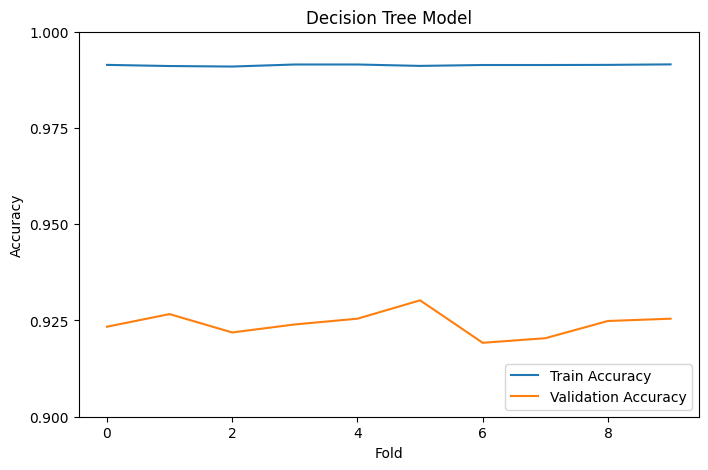

In [11]:
fig, ax = plt.subplots(figsize=(8, 5))
decision_tree_train_line, = ax.plot(decisionModel['Train Accuracy'])
decision_tree_val_line, = ax.plot(decisionModel['Validation Accuracy'])
ax.set_title("Decision Tree Model")
ax.set_xlabel("Fold")
ax.set_ylabel("Accuracy")
ax.set_yticks(np.linspace(0.9, 1, num=5))
ax.legend([decision_tree_train_line, decision_tree_val_line], decisionModel.columns, loc = "lower right")
plt.show()

### Model Native-Bayes

In [12]:
train_errors_bayes = []
val_errors_bayes = []
for i in range(10):
    train, val = getTrainValSample(train_sample, i)
    model = GaussianNB()
    model.fit(train[0], train[1])
    train_errors_bayes.append(model.score(train[0], train[1]))
    val_errors_bayes.append(model.score(val[0], val[1]))
    
BayesModel = pd.DataFrame({'Train Accuracy': train_errors_bayes,
                 'Validation Accuracy': val_errors_bayes
                 })

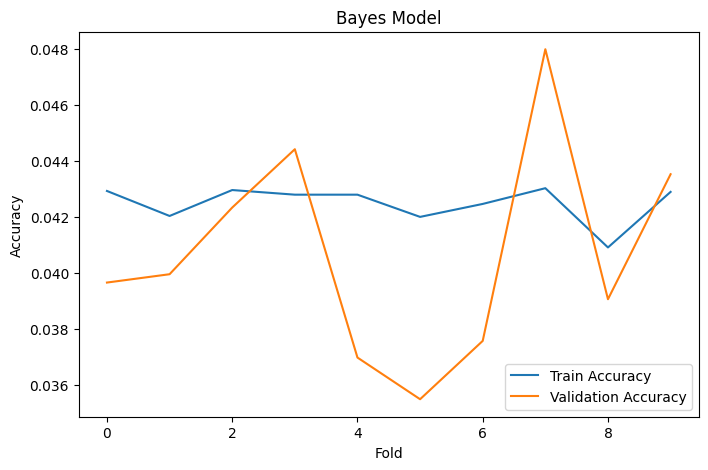

In [13]:
fig, ax = plt.subplots(figsize=(8, 5))
bayes_train_line, = ax.plot(BayesModel['Train Accuracy'])
bayes_val_line, = ax.plot(BayesModel['Validation Accuracy'])
ax.set_title("Bayes Model")
ax.set_xlabel("Fold")
ax.set_ylabel("Accuracy")
ax.legend([bayes_train_line, bayes_val_line], BayesModel.columns, loc = "lower right")
plt.show()

### Model FC with:
- First hidden layer: 1024 node, use 'relu' activation
- Second hidden layer: 512 node, use 'relu' activation
- Output layer: 101 node, use 'softmax' activation

In [14]:
train_errors_FC = []
val_errors_FC = []
for i in range(10):
    train, val = getTrainValSample(train_sample, i)
    x_train = tf.convert_to_tensor(train[0], dtype='float32')
    y_train = tf.convert_to_tensor(train[1])
    x_val = tf.convert_to_tensor(val[0], dtype='float32')
    y_val = tf.convert_to_tensor(val[1])

    model = keras.Sequential(
            [
                keras.Input(shape=(12, ), name = "Input"),
                keras.layers.Dense(512, activation='relu'),
                keras.layers.Dense(1024, activation='relu'),
                keras.layers.Dense(512, activation='relu'),
                keras.layers.Dense(101, activation='softmax', name = 'output'),
            ]
        )
    model.compile(
            optimizer=keras.optimizers.SGD(),
            loss=keras.losses.SparseCategoricalCrossentropy(),
            metrics=[keras.metrics.SparseTopKCategoricalAccuracy()]
        )
    history = model.fit(x_train, 
                                y_train,
                                batch_size=32,
                                epochs=5,
                                validation_data=(x_val, y_val),
                            )
    
    train_errors_FC.append(history.history['val_sparse_top_k_categorical_accuracy'][-1])
    val_errors_FC.append(history.history['sparse_top_k_categorical_accuracy'][-1])
    
FCModel = pd.DataFrame({'Train Accuracy': train_errors_FC,
                 'Validation Accuracy': val_errors_FC
                 })

Epoch 1/5
944/944 [==============================] - 11s 11ms/step - loss: 4.3215 - sparse_top_k_categorical_accuracy: 0.1981 - val_loss: 3.9728 - val_sparse_top_k_categorical_accuracy: 0.2033
Epoch 2/5
944/944 [==============================] - 10s 11ms/step - loss: 3.8991 - sparse_top_k_categorical_accuracy: 0.2127 - val_loss: 3.8920 - val_sparse_top_k_categorical_accuracy: 0.2108
Epoch 3/5
944/944 [==============================] - 12s 13ms/step - loss: 3.8681 - sparse_top_k_categorical_accuracy: 0.2160 - val_loss: 3.8705 - val_sparse_top_k_categorical_accuracy: 0.2135
Epoch 4/5
944/944 [==============================] - 10s 11ms/step - loss: 3.8529 - sparse_top_k_categorical_accuracy: 0.2209 - val_loss: 3.8534 - val_sparse_top_k_categorical_accuracy: 0.2171
Epoch 5/5
944/944 [==============================] - 11s 11ms/step - loss: 3.8336 - sparse_top_k_categorical_accuracy: 0.2296 - val_loss: 3.8316 - val_sparse_top_k_categorical_accuracy: 0.2263
Epoch 1/5
944/944 [================

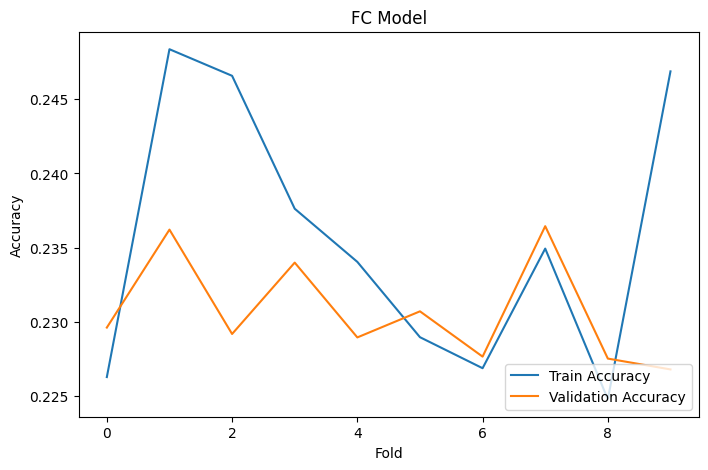

In [15]:
fig, ax = plt.subplots(figsize=(8, 5))
FC_model_train_line, = ax.plot(FCModel['Train Accuracy'])
FC_model_val_line, = ax.plot(FCModel['Validation Accuracy'])
ax.set_title("FC Model")
ax.set_xlabel("Fold")
ax.set_ylabel("Accuracy")
ax.legend([FC_model_train_line, FC_model_val_line], FCModel.columns, loc = "lower right")
plt.show()

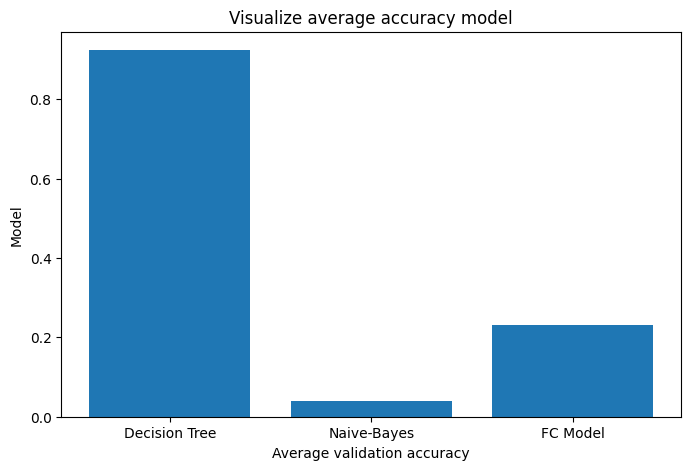

In [16]:
compare_model = {
    'Decision Tree': decisionModel['Validation Accuracy'].mean(),
    'Naive-Bayes': BayesModel['Validation Accuracy'].mean(),
    'FC Model': FCModel['Validation Accuracy'].mean()
}
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title("Visualize average accuracy model")
ax.set_ylabel("Model")
ax.set_xlabel("Average validation accuracy")
ax.bar(compare_model.keys(), compare_model.values())
plt.show()

## Comment
As we see, 3 model will train are compared using k-fold cross validation and model Decision tree give a highest accurancy. So, we will use Decision Tree model to solve our problem

In [17]:
x_train, y_train = train_sample.iloc[:, :-1], train_sample.iloc[:, -1:]
x_test, y_test = test_sample.iloc[:, :-1], test_sample.iloc[:, -1:]
print(f"x_train shape: {x_train.shape}\n"
      f"y_train shape: {y_train.shape}"
      )

x_train shape: (33542, 12)
y_train shape: (33542, 1)


In [18]:
model = DecisionTreeClassifier(criterion='gini')
model.fit(x_train, y_train)
model.get_depth()

44

<a id="1.2"></a>
<h2 style=" font-family: Arial; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #008B8B; padding: 15px; border-top: 2px solid blue; border-bottom: 2px solid blue;
"><b>Evaluation </b>

In [19]:
y_train_pred = model.predict(x_train)
report = classification_report(y_true=y_train, y_pred=y_train_pred, labels = model.classes_)
print(report)

              precision    recall  f1-score   support

          10       1.00      1.00      1.00       128
          11       1.00      1.00      1.00         1
          13       1.00      1.00      1.00        21
          15       1.00      1.00      1.00        16
          16       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         1
          18       1.00      1.00      1.00         2
          20       0.98      1.00      0.99       160
          21       1.00      1.00      1.00         1
          23       1.00      1.00      1.00        28
          24       1.00      1.00      1.00         6
          25       0.96      0.56      0.71        43
          26       1.00      1.00      1.00         6
          27       1.00      1.00      1.00        17
          28       1.00      1.00      1.00         4
          29       1.00      1.00      1.00        23
          30       0.97      1.00      0.98       230
          31       1.00    

<a id="1.2"></a>
<h2 style=" font-family: Arial; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #008B8B; padding: 15px; border-top: 2px solid blue; border-bottom: 2px solid blue;
"><b>Prediction </b>

In [20]:
y_pred = model.predict(x_test)
accuracy_predict = accuracy_score(y_test, y_pred)
print(f"accuracy test: {accuracy_predict}")

accuracy test: 0.930113297555158


<a id="1.2"></a>
<h2 style=" font-family: Arial; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #008B8B; padding: 15px; border-top: 2px solid blue; border-bottom: 2px solid blue;
"><b>Results </b> analysis

In [21]:
text_representation = sklearn.tree.export_text(model)
print(text_representation)

|--- feature_7 <= 0.00
|   |--- feature_7 <= 0.00
|   |   |--- feature_3 <= 0.23
|   |   |   |--- feature_3 <= 0.18
|   |   |   |   |--- feature_5 <= 0.38
|   |   |   |   |   |--- feature_2 <= 0.02
|   |   |   |   |   |   |--- feature_1 <= 0.07
|   |   |   |   |   |   |   |--- feature_3 <= 0.07
|   |   |   |   |   |   |   |   |--- feature_8 <= 0.00
|   |   |   |   |   |   |   |   |   |--- feature_6 <= 0.12
|   |   |   |   |   |   |   |   |   |   |--- feature_3 <= 0.02
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 13
|   |   |   |   |   |   |   |   |   |   |--- feature_3 >  0.02
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 13
|   |   |   |   |   |   |   |   |   |--- feature_6 >  0.12
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 0.04
|   |   |   |   |   |   |   |   |   |   |   |--- class: 70
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  0.04
|   |   |   |   |   |   |   |   |   |   |   |--- class: 90
|   |

In [22]:
print(model.get_depth())

44


It is apparently seen that model after training get F1 score equal to 0.99 which is pretty good. Moreover, the tree is built with depth = 41, it will guarantee our model won't be over-fitting. This is represented clearly on test set with a high accuracy nearly 0.93. Generally, this model is evaluated quite well and it is likely to apply to our daily lives.

<a id="1.2"></a>
<h2 style=" font-family: Arial; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #008B8B; padding: 15px; border-top: 2px solid blue; border-bottom: 2px solid blue;
"><b>Conclusion </b> 

Decision Tree Classifier is a machine learning model that can be used to predict a target variable based on a set of features. In this case, the target variable is the player rating of a board game, and the features are the game's characteristics, such as its genre, complexity, playtime, and price.

This model can be used by board game publishers to make more informed decisions about the types of games to create in the future. By understanding the factors that influence player ratings, publishers can create games that are more likely to be successful.

Specific benefits of using this model include:

Improved game development efficiency: By understanding the factors that contribute to player satisfaction, publishers can reduce the time and resources required to develop new games.
Increased game marketability: By creating games that are more likely to be rated highly, publishers can increase their chances of success in the market.
Enhanced player satisfaction: By creating games that meet the needs of players, publishers can increase player satisfaction and loyalty.